# CIFAR 10

We try to implement a Resnet 34 model for with the best parameter settings as mentioned in their respective paper and try to implement our own version of algorithm

In [1]:
import os
%matplotlib notebook
import matplotlib.pyplot as plt
import torch
import numpy as np

LABELS = ['SGD','ADAGRAD','ADAM','AMSBOUND','ADABOUND','AMSGRAD','GGDO2']

In [2]:
def get_folder_path(use_pretrained=True):
    path = 'curve/trained2'
    if use_pretrained:
        path = os.path.join(path, 'pretrained')
    return path

In [3]:
def get_curve_data(use_pretrained=True, model='ResNet'):
    folder_path = get_folder_path(use_pretrained)
    filenames = [name for name in os.listdir(folder_path) if name.startswith(model.lower())]
    paths = [os.path.join(folder_path, name) for name in filenames]
    keys = [name.split('-')[1] for name in filenames]
    return {key: torch.load(fp) for key, fp in zip(keys, paths)}

In [4]:
def plot(use_pretrained=True, model='ResNet', optimizers=None, curve_type='train', plot_acc=True):
    assert model in ['ResNet', 'DenseNet'], 'Invalid model name: {}'.format(model)
    assert curve_type in ['train', 'test'], 'Invalid curve type: {}'.format(curve_type)
    assert all(_ in LABELS for _ in optimizers), 'Invalid optimizer'
    
    curve_data = get_curve_data(use_pretrained, model=model)
    
    if plot_acc==True:
        plt.figure()#figsize=(10,6))
        plt.title('{} Accuracy for {} on CIFAR-10'.format(curve_type.capitalize(), model))
        plt.xlabel('Epoch')
        plt.ylabel('{} Accuracy %'.format(curve_type.capitalize()))
    
        plt.ylim(80, 101 if curve_type == 'train' else 96)
        plt_acc = 'acc'
        for optim in optimizers:
            linestyle = '--' if 'GGDO' in optim else '-'
            accuracies = np.array(curve_data[optim.lower()]['{}_{}'.format(curve_type,plt_acc)])
            plt.plot(accuracies, label=optim, ls=linestyle)
    
    else:
        plt.figure()
        plt.title('{} Categorical Cross Entropy Loss for {} on CIFAR-10'.format(curve_type.capitalize(), model))
        plt.xlabel('Epoch')
        plt.ylabel('{} Loss'.format(curve_type.capitalize()))
    
        plt_acc = 'loss'
        for optim in optimizers:
            linestyle = '--' if 'GGDO' in optim else '-'
            accuracies = np.array(curve_data[optim.lower()]['{}_{}'.format(curve_type,plt_acc)])
            plt.plot(accuracies, label=optim, ls=linestyle)
    
        
    plt.grid(ls='--')
    plt.legend()
    plt.show()

The above function is for plotting the learning curves. To use your own data points, set `use_pretrained` as `False`.

# ResNet

First, let's see the results with ResNet-34.

### For all the optimizers:


We observe that the performance on the training and test set is almost simmilar to Adaptive methods early on in training and it converges to a more genrealizable solution akin to SGD after the learning rate is decayed at 150th Epoch

<IPython.core.display.Javascript object>


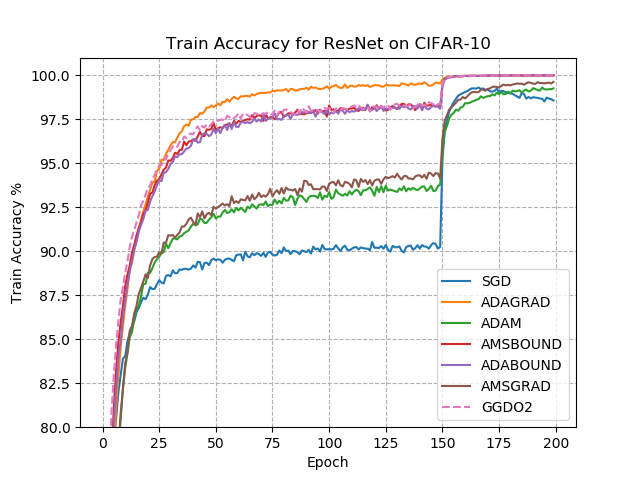

<IPython.core.display.Javascript object>


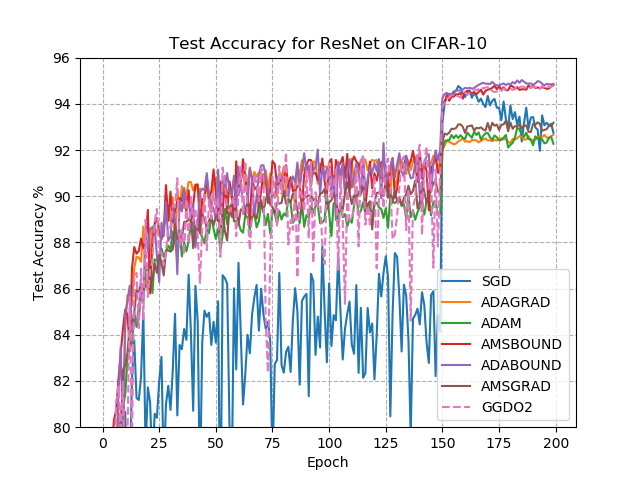

In [5]:
LABELS = ['SGD','ADAGRAD','ADAM','AMSBOUND','ADABOUND','AMSGRAD','GGDO2']
plot(use_pretrained=False, model='ResNet', optimizers=LABELS, curve_type='train',plot_acc=True)
plot(use_pretrained=False, model='ResNet', optimizers=LABELS, curve_type='test',plot_acc=True)

### GGDO vs SGD

We see that performance on the training and test set is better than sgd at early stages, and the performance on test set is comparable to it after the learning rate has been decayed. 

The performance dip at the end of the training is due to SGD not being stable (as mentioned in the orignal ResNet paper), rather than overtraining/overfitting. 

We see that GGDO is more stable than SGD. This is consistent with Stochastic Gradient Langvin Dynamics which states that the method would achieve convergence if the noise shrinks asymptotically (as we observe when the model converges the variance of the noise estimated from the past gradients goes small and hence the model converges)

<IPython.core.display.Javascript object>


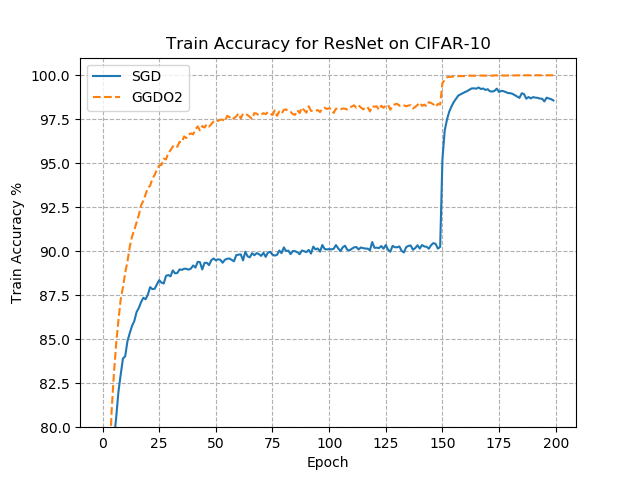

<IPython.core.display.Javascript object>


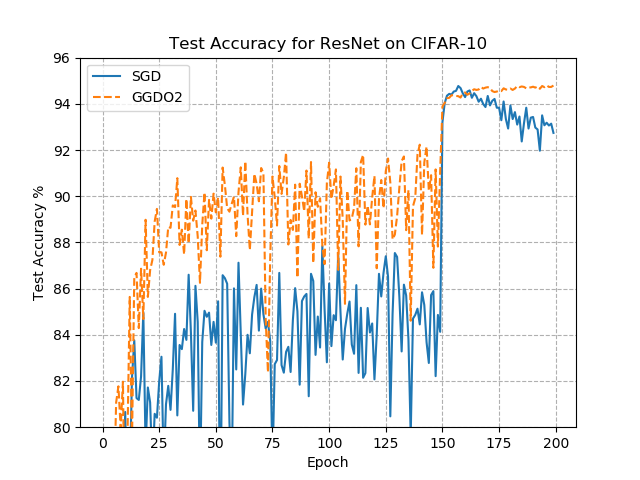

In [6]:
LABELS = ['SGD','GGDO2']
plot(use_pretrained=False, model='ResNet', optimizers=LABELS, curve_type='train',plot_acc=True)
plot(use_pretrained=False, model='ResNet', optimizers=LABELS, curve_type='test',plot_acc=True)

### GGDO vs Adaptive methods

We see that during early training, GGDO converges as good as the conventional adaptive methods such as ADAM, ADAGrad, AMSGrad etc. and GGDO converges to a better solution as learning rate is decayed. 

<IPython.core.display.Javascript object>


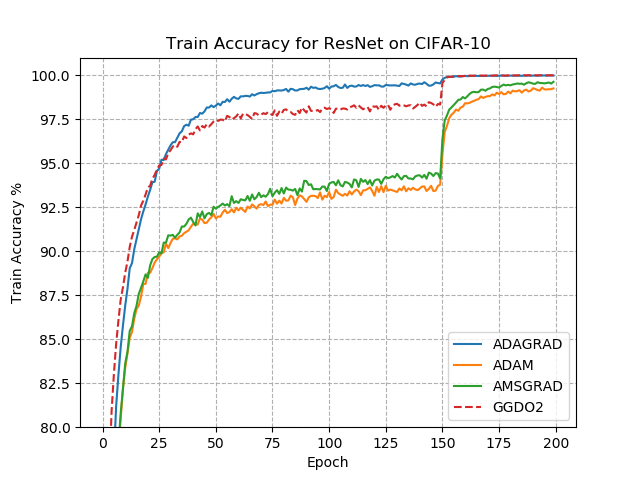

<IPython.core.display.Javascript object>


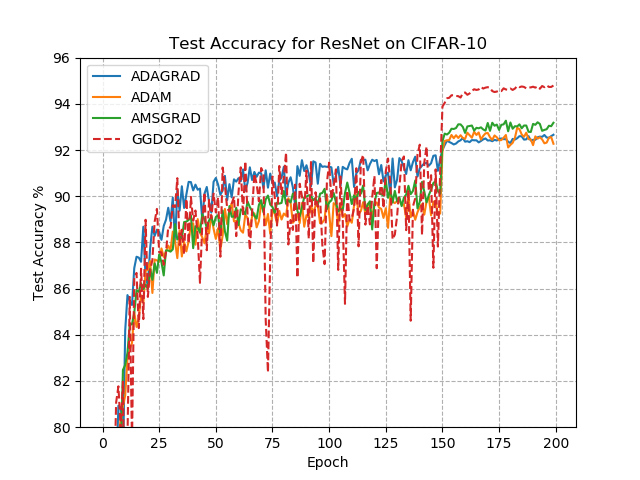

In [7]:
LABELS = ['ADAGRAD','ADAM','AMSGRAD','GGDO2']
plot(use_pretrained=False, model='ResNet', optimizers=LABELS, curve_type='train',plot_acc=True)
plot(use_pretrained=False, model='ResNet', optimizers=LABELS, curve_type='test',plot_acc=True)

### GGDO vs ADABound & AMSBound (ICLR 2019)

We see that the training and test set performance is simmilar to the adaptive methods such as ADABound and AMSBound(regularization on the per parameter scale). We show that simmilar performance can be reached with the help of less hyper-parameters and a SGD like structure.

<IPython.core.display.Javascript object>


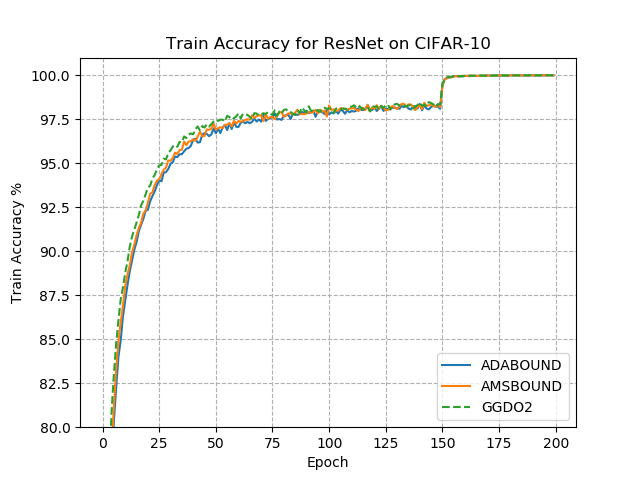

<IPython.core.display.Javascript object>


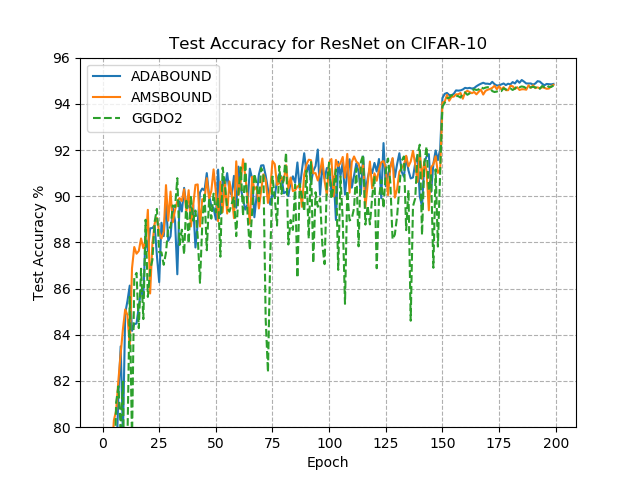

In [8]:
LABELS = ['ADABOUND','AMSBOUND','GGDO2']
plot(use_pretrained=False, model='ResNet', optimizers=LABELS, curve_type='train',plot_acc=True)
plot(use_pretrained=False, model='ResNet', optimizers=LABELS, curve_type='test',plot_acc=True)





# GGDO vs Stochastic Gradient Langevin Dynamics with annealed noise

We see that GGDO simply outperforms SGLD by a margin overall in both training speed and better genrealizability

<IPython.core.display.Javascript object>


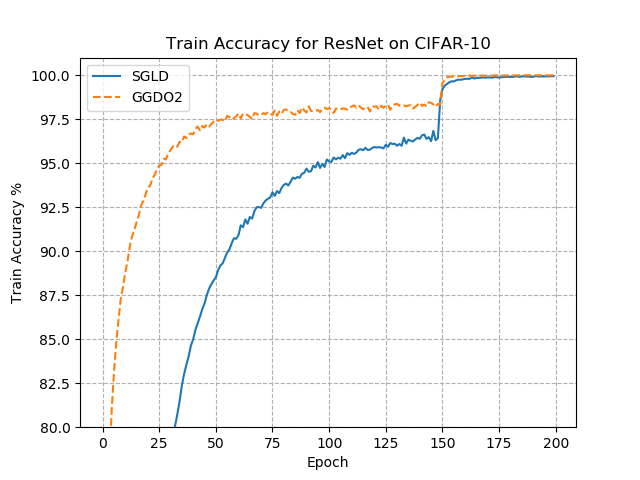

<IPython.core.display.Javascript object>


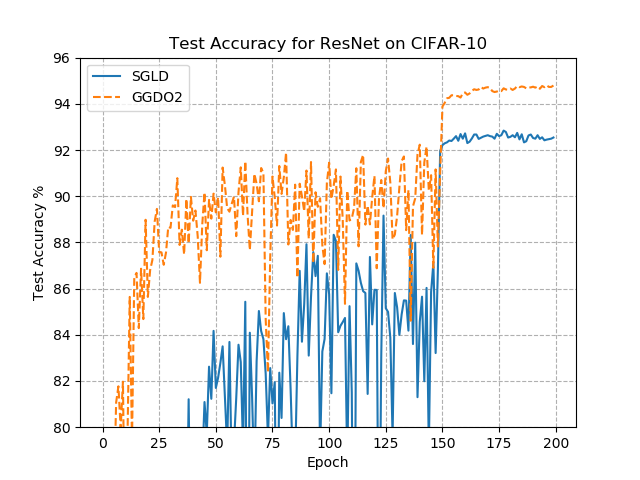

In [9]:
LABELS = ['SGLD','GGDO2']
plot(use_pretrained=False, model='ResNet', optimizers=LABELS, curve_type='train',plot_acc=True)
plot(use_pretrained=False, model='ResNet', optimizers=LABELS, curve_type='test',plot_acc=True)



# DenseNet 

We compare the results of GGDO with other methods while training DenseNet on CIFAR 10

<IPython.core.display.Javascript object>


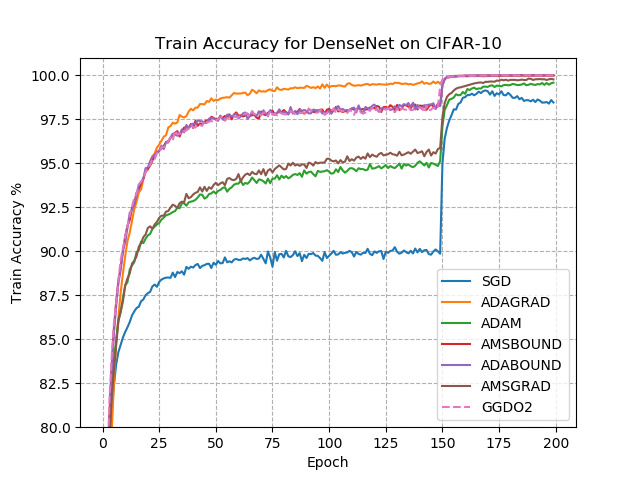

<IPython.core.display.Javascript object>


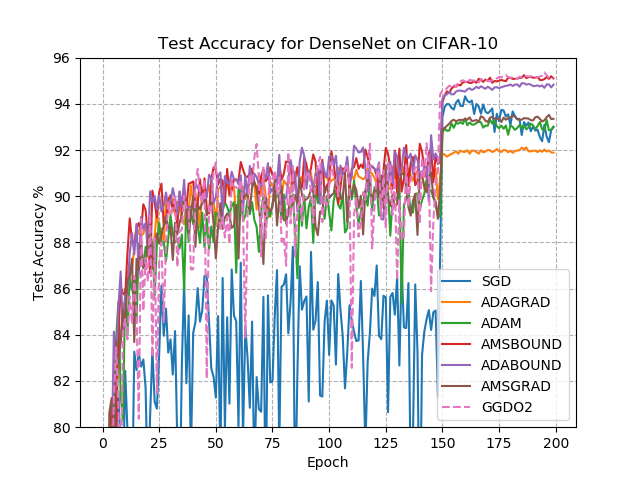

In [10]:
LABELS = ['SGD','ADAGRAD','ADAM','AMSBOUND','ADABOUND','AMSGRAD','GGDO2']
plot(use_pretrained=False, model='DenseNet', optimizers=LABELS, curve_type='train')
plot(use_pretrained=False, model='DenseNet', optimizers=LABELS, curve_type='test')


### GGDO vs SGD

We see that GGDO has a substantially faster convergance, and also a reasonable genrealization performance improvement over SGD while training the model

<IPython.core.display.Javascript object>


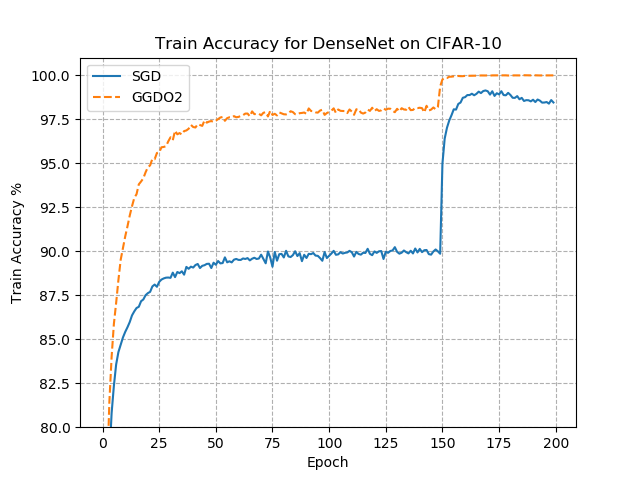

<IPython.core.display.Javascript object>


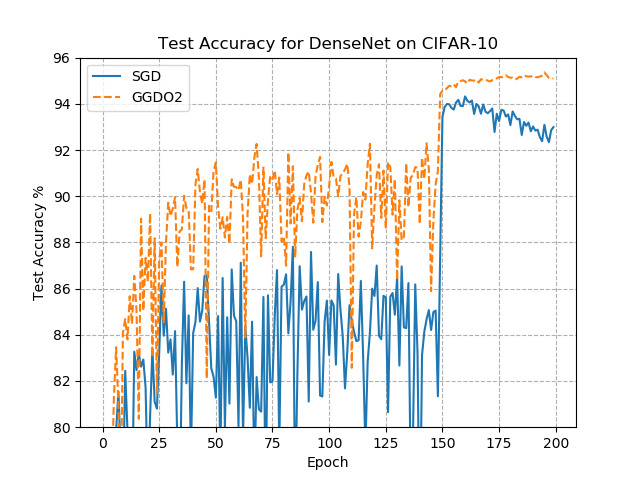

In [11]:
LABELS = ['SGD','GGDO2']
plot(use_pretrained=False, model='DenseNet', optimizers=LABELS, curve_type='train')
plot(use_pretrained=False, model='DenseNet', optimizers=LABELS, curve_type='test')



### GGDO vs Adaptive Methods

We see that training speed is simmilar to Adaptive Methods, but by the time the learning rate is decayed, GGDO has a substantiall genrealization improvment over other Adaptive Methods

<IPython.core.display.Javascript object>


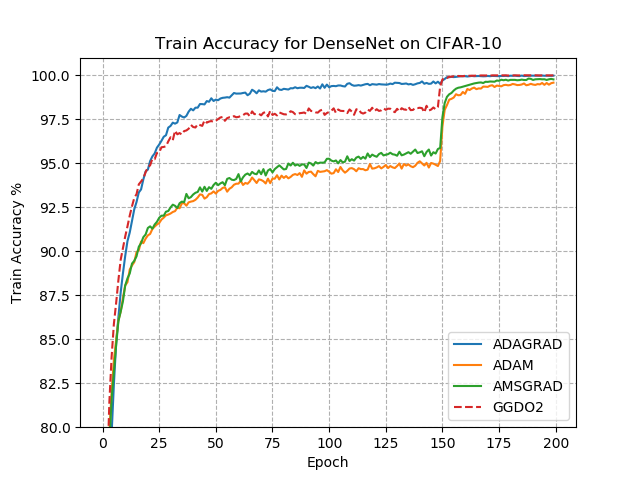

<IPython.core.display.Javascript object>


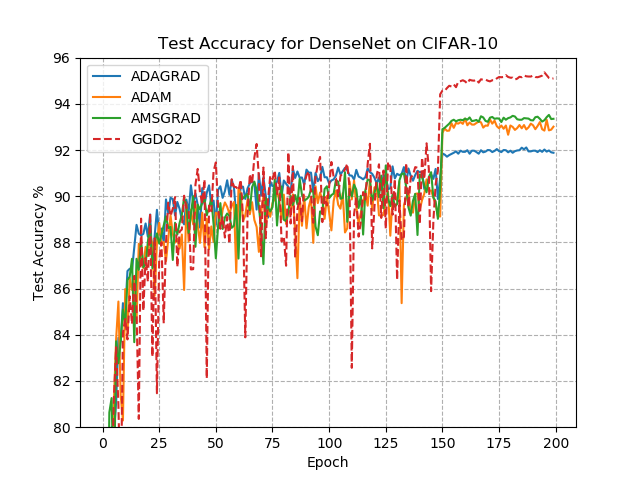

In [12]:
LABELS = ['ADAGRAD','ADAM','AMSGRAD','GGDO2']
plot(use_pretrained=False, model='DenseNet', optimizers=LABELS, curve_type='train')
plot(use_pretrained=False, model='DenseNet', optimizers=LABELS, curve_type='test')

### GGDO vs ADABound & AMSBound (ICLR 2019)

We see that GGDO has simmilar performance as ADABound and AMSBound. GGDO achieves the same result with a diffrent training method.

<IPython.core.display.Javascript object>


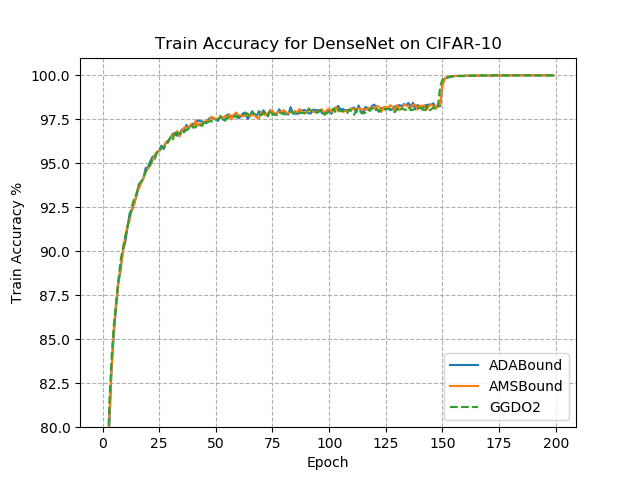

<IPython.core.display.Javascript object>


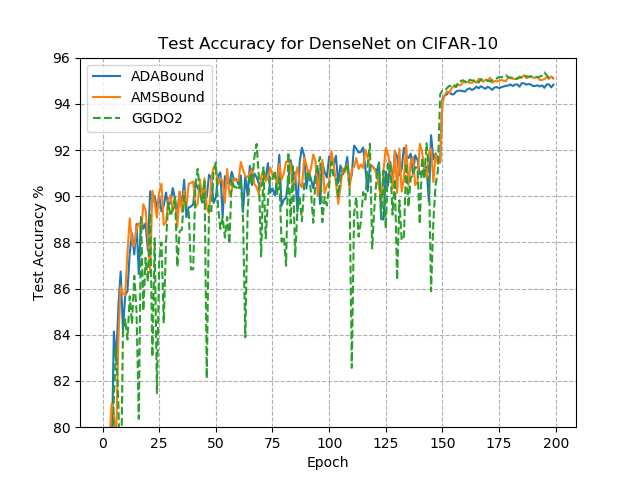

In [13]:
LABELS = ['ADABound','AMSBound','GGDO2']
plot(use_pretrained=False, model='DenseNet', optimizers=LABELS, curve_type='train')
plot(use_pretrained=False, model='DenseNet', optimizers=LABELS, curve_type='test')

#### Thus we see that GGDO performs well in terms of convergance speed as well as genrealizability